# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
# YOUR CODE HERE
iris= pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/iris/iris.tsv.gz", sep="\t")
sample= iris.sample(n=10)
sample

,sepal-length,sepal-width,petal-length,petal-width,target
53,6.3,2.5,4.9,1.5,1
90,6.5,3.2,5.1,2.0,2
24,6.5,2.8,4.6,1.5,1
108,6.1,3.0,4.9,1.8,2
71,4.7,3.2,1.6,0.2,0
79,6.3,2.5,5.0,1.9,2
134,4.8,3.0,1.4,0.1,0
19,5.8,2.7,5.1,1.9,2
121,6.4,2.7,5.3,1.9,2
113,5.5,2.3,4.0,1.3,1


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [44]:
# YOUR CODE HERE
columns = list(iris.columns)
columns
# sepal-length: Length of the sepal in cm (the leaf form that grows around/under the petals)
# sepal-width: Width of the sepal in cm
# petal-length: Length of the petal in cm
# petal-width: Width of petal in CM
# target: A catorigization, the type of iris plant of each entry: 0: Iris Setosa, 1: Iris Versicolour, 2:Iris Virginica, for 3 different types in total

#What exactly each of the columns are in this dataset are fairly straight forward. The first four columns are floats, with the target integer.
#There are no missing datapoints, and we are told there are a total of 150 samples, 50 of each target
# The dataset tells us that of the 3 different types, one of them is linearlly distinguishable from the other two through the provided metrics
#This means we can guess that graphs of the data may be skewed one way, with a 1/3 2/3 split

['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target']

YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

<function matplotlib.pyplot.show(close=None, block=None)>

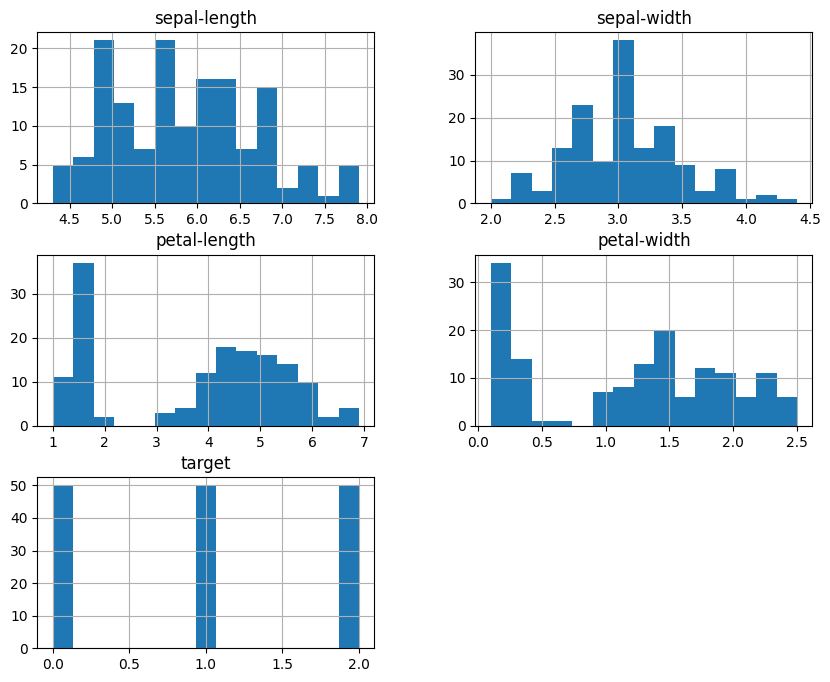

In [6]:
# YOUR CODE HERE
iris.hist(figsize=(10, 8), bins=15)
plt.show

#SEPAL-LENGTH: This is a continuous distribution with values between 4 and 8 (cm) where we see a majority of the data is clustered towards the middle. 
# My best guess would be bimodal, as we see a coupple of different peaks. From what we know of the dataset this seems to make sense, 
# as only one target is linearly distinguishable

#SEPAL-WIDTH: This is another continuous distribution with values between 2 and 4.5 (cm). This is closest to a classic gaussian distribution or 
# normal distribution. Is has the signature bell-curve shape with a peak in the middle and low outliers as points get more standard deviations away 
# from the middle. From what we know about the 1/3 2/3 nature of this dataset, this is an interesting finding. We can make a guess 
# that the sepal-width may not be a large linear factor in the iris-type classification (the target)

# PETAL-LENGTH: This is a continuous distribution with values between 1 and 7 (cm). A right skewed distribution is a fair assessment for this 
# column, as we see the high amount of petal-length between 1-2cm, and a more spread out petal-length between 3-7cm. However, from what we 
#know about this dataset and given the empty gap between roughly 2cm and 3cm, we can also see a bimodal relationship. This lens of thinking 
# indicates there are two different groups (which we know to be true), and points to the fact that this may be a good indicator for classification 

#PETAL-WIDTH: This is a continuous distribution with values between 0 and 2.5 (cm). This distribution is very similar 
# to the previous petal-length distribution. We see a right skew, most likely from the the iris that is linearlly different. 
# For both petal width and length we can even roughly count to see that the numbers line up. The right skew portion has about a 50 count, while the 
# rest of the graph has roughly a 100count, giving us the total 150 1/3 2/3 split that is mentioned. 

#TARGET: This is the texbook defintion of a discrete distribution. The first sign of this is the fact that there are only 3 bars, each at an integer.
# We see that each target makes up 1/3 of the sample size, and each target has the same chance of being randomly selected. This means the distribution
# for this histogram is uniform. The dataset description was very upfront about these features, so this is expected. 

YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

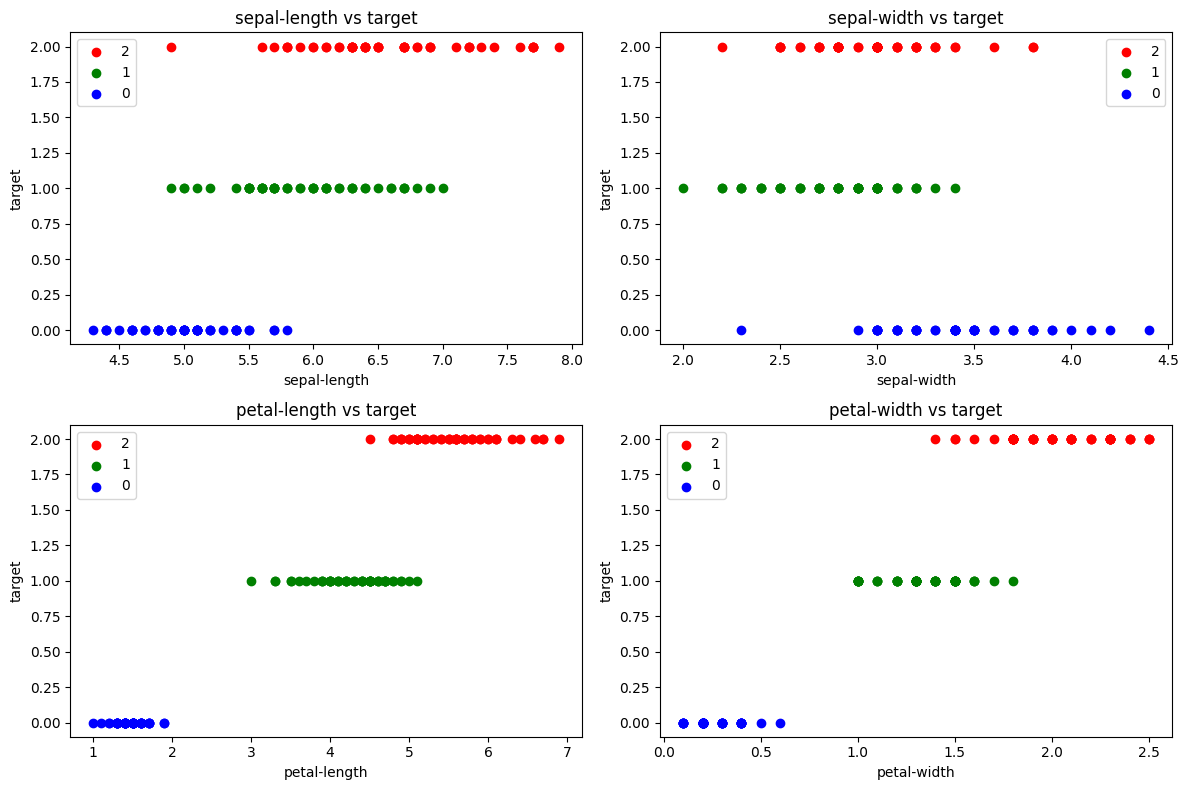

sepal-length vs target: correlation = 0.78
sepal-width vs target: correlation = -0.42
petal-length vs target: correlation = 0.95
petal-width vs target: correlation = 0.96


In [7]:
# YOUR CODE HERE
# create plots
input_columns = [col for col in iris.columns if col != 'target']
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b'] 
for i, col in enumerate(input_columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid
    for target_class, color in zip(iris['target'].unique(), colors):
        subset = iris[iris['target'] == target_class]
        plt.scatter(subset[col], subset['target'], color=color, label=str(target_class))
    plt.xlabel(col)
    plt.ylabel('target')
    plt.title(f'{col} vs target')
    plt.legend()
plt.tight_layout()
plt.show()
# calculate correlation
correlations = {}
for col in input_columns:
    correlations[col] = iris[col].corr(iris['target'])
for col, corr in correlations.items():
    print(f"{col} vs target: correlation = {corr:.2f}")

#Explanation
#SEPAL-LENGTH vs TARGET: This column seems to be dependent, that is, the target is dependent on the sepal-length. 
# We see that targets 1 and 2 have many more points in common compared to target 0. This further supports the bimodal prediction, 
# and further shows the 1/3 vs 2/3 relationship. A correlation of 0.78 further shows that there is
# a decently strong relationship between the two columns. 

#SEPAL-WIDTH vs TARGET: While this column is less dependent than the previous, I would still say that it is dependent. 
# We still see that targets 1 and 2 are more common than target 0, showing dependency. A key difference is is the flip in relationship. 
# Targets 1 and 2  have a lower sepal-width than target 0 on average, while target 0 has a lower sepal-length than targets 1 and 2. 
# This can be seen when calculating the correlation of -0.42. The relationship itself is reversed (negative correlation) and not as strong.
#Looking back at the histogram, we can see that this weaker relationship (compared to sepal-length vs target) 
# was expected, as the histogram has a normal gaussian distribution.

#PETAL-LENGTH vs TARGET:This column is also dependent, and it is the strongest yet that we've seen. We see that target 0 has no overlap with 
# targets 1 and 2. On the other hand, roughly half of targets 1 and 2 share the same petal length. As stated in the histograms section, 
# we see our prediction about the right skew was correct: All of target 0 creates the peak at the very start, and the similarities between 
# targets 1 and 2 create the rest of the graph that is more evenly distributed. The strong correlation of 0.95 is very easy to see in this plot.
# Following suit of the sepal based plots, we see the positive relationship between target 0 have a lower petal length compared to targets 1 and 2.

#PETAL-WIDTH vs TARGET: This plot looks very similar to the previous, and the relationship looks just as strong. We once again see that target 0 has 
# no overlap with targets 1 and 2, keeping the theme of target 0 being linearly distinguishable from targets 1 and 2. Supporting this, we see that
# targets 1 and 2 once again have major overlap in petal-width, further supporting the claim that targets 1 and 2 are not very linearlly distinguishable.

#Overall, we see that all of these columns are dependent on the target, just to varying degrees. Petals (whether it be length or width) seem to be
# the better metric for classifying iris type (whether target 0 or target 1/2). This being said, all the columns being dependent is to be expected,
# as this dataset was made specifically made for classification training. 

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error: 0.046385088311226945


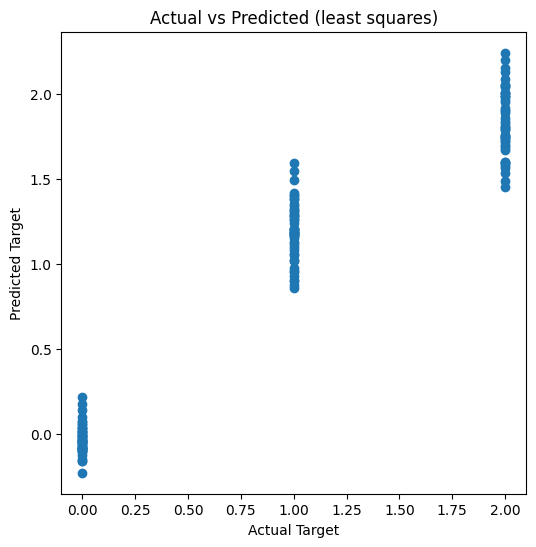

In [11]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
X = iris.drop(columns=["target"])
y = iris["target"]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mse = np.mean((y - y_pred) ** 2)
print("Mean Squared Error:", mse)

plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted (least squares)")
plt.show()

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [ ]:
# YOUR CODE HERE
features = iris.drop(columns=["target"])
y = iris["target"]
for col in features:
    X = iris[[col]]  
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = np.mean((y - y_pred) ** 2)
    print(f"Input Column: {col}")
    print(f"  Manual MSE: {mse}")
  
#The most standard way to compare our linear models is the mean squared error(MSE). It helps that the mean squared error for all of the inputs was already calcualted in problem 5.
#As the term implies, the MSE is calculating the error, meaning the lower the error, the better the model. In our case specifically,
# this would be the mean squared difference between predicted target value (0,1,2) and the actual target value (0,1,2). Calculating the MSE for each individual input column 
# we see that it tells a similar story to the plots in question 4. Sepal length has a significantly higher MSE compared to the all input column MSE of 0.046. 
# The sepal width input column MSE is even further away, which lines up with the plots we saw in question 4. Sepal-width has a lot of overlapping points, so it makes sense
# that it would be worse at making a prediction, therefore having more error. Petal length and petal width both have very low MSEs, meaning they are great at predicting the target
# number, which also aligns with the plots we saw in question 4. Given the actual values, we see that petal-width has a lower MSE than petal-length by roughly 0.01, at 0.057. This makes
# petal-width our best individual input column linear model. Comparing this to the group input column MSE, it is only slightly higher (by about 0.01). This means that the 
# collective of all the inputs is better at predicting the target than petal-width individually. However, just because the collective is better, does not mean that the two individual
# petal MSEs are not also strong predictors. 

Input Column: sepal-length
  Manual MSE: 0.2583986123119253
Input Column: sepal-width
  Manual MSE: 0.5493765900582834
Input Column: petal-length
  Manual MSE: 0.06621216537347081
Input Column: petal-width
  Manual MSE: 0.05678463583919234


YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

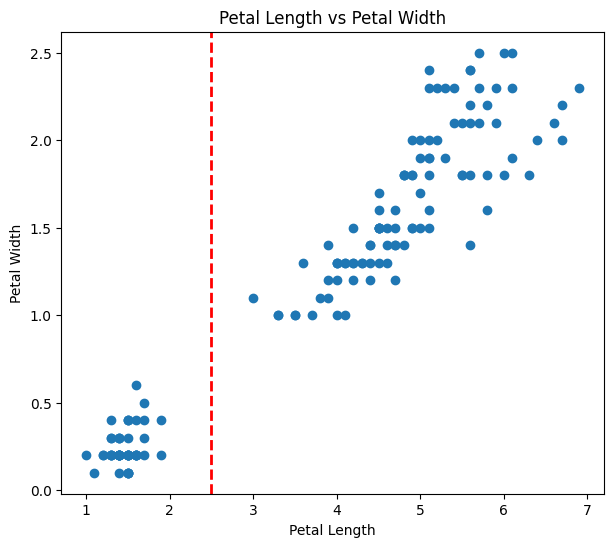

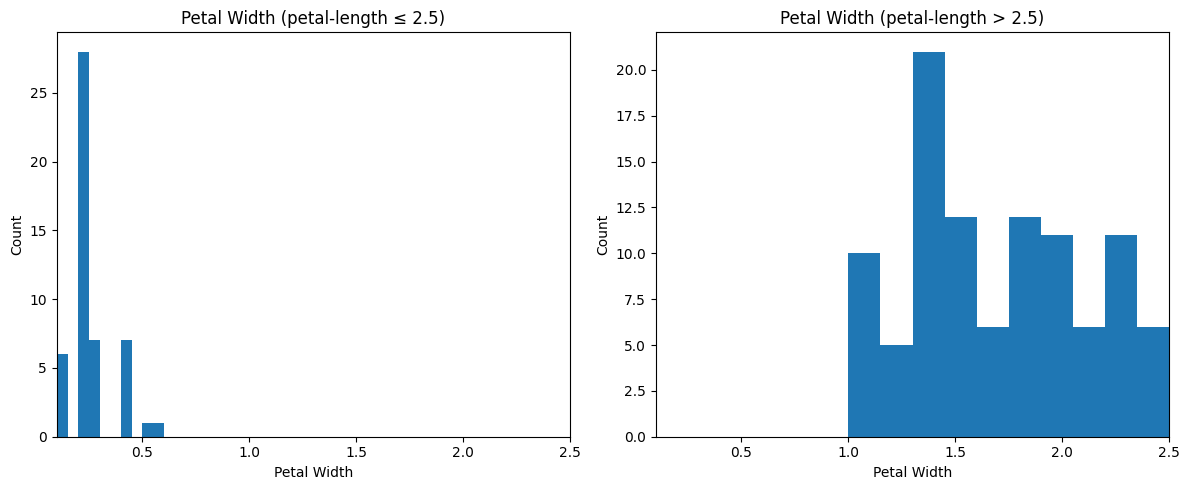

In [11]:
# YOUR CODE HERE
x = iris["petal-length"]
y = iris["petal-width"]
split_value = 2.5
plt.figure(figsize=(7, 6))
plt.scatter(x, y)
plt.axvline(split_value, color="red", linewidth=2, linestyle="--", label=f"Split at {split_value}")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Petal Width")
plt.show()


group_low = iris[iris["petal-length"] <= split_value]["petal-width"]
group_high = iris[iris["petal-length"] > split_value]["petal-width"]
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(group_low, bins=10)
plt.title(f"Petal Width (petal-length ≤ {split_value})")
plt.xlabel("Petal Width")
plt.xlim(iris["petal-width"].min(), iris["petal-width"].max())
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(group_high, bins=10)
plt.title(f"Petal Width (petal-length > {split_value})")
plt.xlabel("Petal Width")
plt.xlim(iris["petal-width"].min(), iris["petal-width"].max())
plt.ylabel("Count")

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

0.04638508831122694
0.9580097536148264
0.0714672509163902


Text(0.5, 1.0, 'Actual vs Predicted (Half-Feature PCA)')

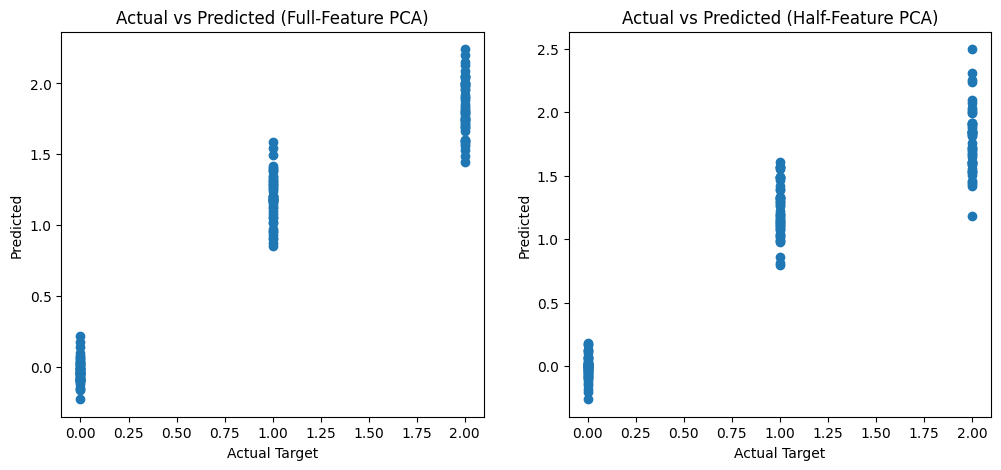

In [34]:
# YOUR CODE HERE
##Perform principal components analysis of the input columns.
features = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
features_normalized = iris[features] / iris[features].std()
features_normalized.std()
y = iris["target"]
normalized_pca=PCA()
normalized_pca.fit(features_normalized.dropna())
full_model = LinearRegression()
full_model.fit(features_normalized, y)
y_pred_full = full_model.predict(features_normalized)
mse_full = np.mean((y - y_pred_full)**2)
print(mse_full)

##Compute how much of the data variation is explained by the first half of the principal components.
k = len(features) // 2
X_pca = normalized_pca.transform(features_normalized)
first_half = normalized_pca.explained_variance_ratio_[:k].sum()
print(first_half) ##0.9580097536148264~ 96% of data variation is explained by the first two principal components

##Build a linear regression using coordinates computed from the first half of the principal components.
X_pca_subset = X_pca[:, :k]
pca_model = LinearRegression()
pca_model.fit(X_pca_subset, y)
y_pred_pca = pca_model.predict(X_pca_subset)

##Compare the mean squared error of this model to the previous model.
mse_pca = np.mean((y - y_pred_pca)**2)
print (mse_pca)
#The full feature MSE is about 0.046, while the half feature MSE is about 0.071. Obviously, more features will provide us with a more stable result so this is expected.
#This being said, the first half model still has a relatively low MSE, and we see from the graphs below that they are fairly similar. 


##Plot actual targets vs predictions again. 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_full)
plt.xlabel("Actual Target")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Full-Feature PCA)")
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_pca)
plt.xlabel("Actual Target")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Half-Feature PCA)")


YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE
corr_matrix = iris[["sepal-length", "sepal-width", "petal-length", "petal-width"]].corr()
corr_matrix
#The two input columns with the highest coreelation is petal-width and petal-length, with a correlation of .962. This is a very strong correlation. 
#A perfect correlation means that the variables linearlly respond to each other 1-1. In the context of principal components, this means that there will be very little variance
#explained going from one component to another. 

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

     sepal-length  sepal-width  petal-length  petal-width
118     -0.173094     3.104284     -1.280118    -1.046525
sepal-length    5.7
sepal-width     4.4
petal-length    1.5
petal-width     0.4
target          0.0
Name: 118, dtype: float64


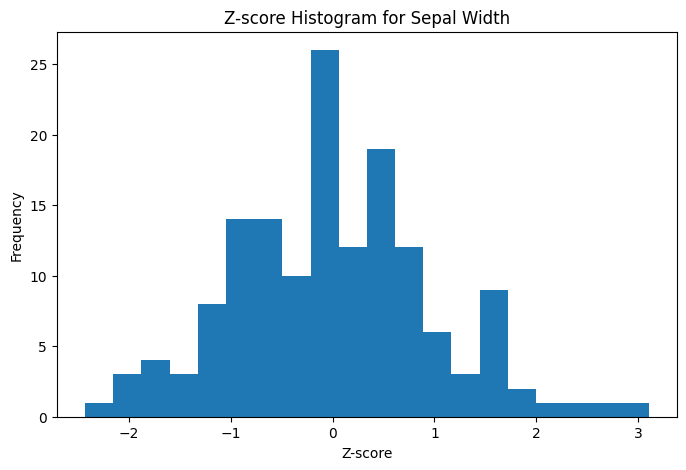

In [ ]:
# YOUR CODE HERE
#Search for outliers based on z-score
features = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
X = iris[features]
z = (X - X.mean()) / X.std()
outlier_check = (np.abs(z) > 3).any(axis=1)
outliers = z[outlier_check]
print(outliers)
print(iris.loc[118])

#Visualization
feature = "sepal-width"
z_sw = z[feature]
plt.figure(figsize=(8, 5))
plt.hist(z_sw, bins=20)
plt.title("Z-score Histogram for Sepal Width")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()
##While, checking for outliers, I decided to use z-scores because they seem the most intuitive for me. I decided to cast a tight net to look if any row had a column with a z-score
#greater than 3. To my surprise, it returned with row 118, with a z-score of 3.104 in the sepal-width column. This having such a high outlier column makes the most sense, because
# as the analysis in problem #3 told us, sepal-width is the closest we have to a traditional gaussian distribution. From the visualization, we can compare ths sepal-width z-score of 3.1
#and see that there isn't really competition on the other end, with the most estranged value having a z-score of around 2.5. While the other features may not be great for a z-score outlier
#test, I think it was really interesting to see the relationship between the normal distribution of sepal-width, and the fact that it was the only feature to have such an obvious outlier.


YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE